In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
# Load the data
data = pd.read_excel("Raisin_Dataset.xlsx")

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


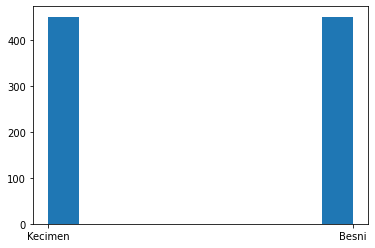

Running Random Forest...
Running Support Vector Machine...


In [3]:
# Load the data
data = pd.read_excel("Raisin_Dataset.xlsx")

# Check for missing values
print(data.isnull().sum())

# Check for outliers
plt.hist(data['Class'])
plt.show()

# Remove outliers
#data = data[data['Volume'] < 50]

# Encode categorical variables (if any)
# No categorical variables in this dataset

#Transform Class column to 0 and 1 column : Kecimen = 1 and Besni = 0
data["Class"] = np.where(data["Class"] == 'Kecimen',1,0)

# Split the data into training and test sets
X = data.drop(['Class'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Define the classifiers and their parameter grids
classifiers = {
    'Random Forest': (RandomForestClassifier(),
                      {'n_estimators': [50, 100, 200],
                       'criterion': ['gini', 'entropy'],
                       'max_depth': [2, 4, 6, 8, 10]}),
    'Support Vector Machine': (SVC(),
                               {'C': [0.01, 0.1, 1, 10, 100],
                                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                                'degree': [2, 3, 4],
                                'gamma': ['scale', 'auto']}),
    'XGBoost': (XGBClassifier(),
                {'learning_rate': [0.01, 0.1, 0.5],
                 'max_depth': [2, 4, 6, 8, 10],
                 'n_estimators': [50, 100, 200]})
}

# Train and evaluate the classifiers
results = {}
for name, (classifier, param_grid) in classifiers.items():
    print(f'Running {name}...')
    grid_search = GridSearchCV(classifier, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    results[name] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted'),
        'fit_time': grid_search.cv_results_['mean_fit_time'].mean(),
        'score_time': grid_search.cv_results_['mean_score_time'].mean()
    }
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower center')
    

    #plt.plot(recall_score(y_test, y_pred, average='weighted'), results[f"{name}"].get('recall'))
    #plt.xlabel('Precision')
    #plt.ylabel('Recall')
    #plt.title(f"{name}")
    #plt.show()
plt.show()

# Print the results
for name, result in results.items():
    print(name)
    for measure, value in result.items():
        print(f'measure:  {measure}, value : {value}')
